## Combining All ML Models to Compare in ROC Graph

In [1]:
# Load dependencies for all models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import matplotlib
%matplotlib inline  
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import pickle

from sklearn.metrics import confusion_matrix
import itertools

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Using TensorFlow backend.


In [2]:
# import XLS file
path1 = ".\\credit_cards_dataset.csv"
#data = pd.read_excel(path, skiprows=1) # skip the first row of the spreadsheet

path2 = ".\\Data_USD.csv"
#path = 'C:\\Users\\User\\Desktop\\data\\original_data.csv'
#data = pd.read_csv(path, skiprows=1) # skip the first row of the spreadsheet
data1 = pd.read_csv(path1) # skip the first row of the spreadsheet
#data1 = data1.drop('DEFAULT_PAYMENT_NEXT_MO', axis =1).values
data2 = pd.read_csv(path2) # skip the first row of the spreadsheet
# remove spaces from target column name
data2['ID']=np.nan
for i in range(0,30000):
    data2.loc[i,['ID']]=i+1
   

data2=data2.drop('DEFAULT_PAYMENT_NEXT_MO', axis =1)
#pd.merge(data1, data2, on="key", how="outer")
data_sum = pd.merge(data2, data1, on="ID", how="left")

data=data_sum

In [3]:
#df = pd.read_csv(".\\Data_USD.csv")
df=data_sum

In [4]:
print("Original shape of the data: "+ str(df.shape))
features_names = df.columns

Original shape of the data: (30000, 35)


In [5]:
#X = df.drop('DEFAULT_PAYMENT_NEXT_MO', axis =1).values
X = df.drop('default.payment.next.month', axis =1).values
y = df['default.payment.next.month'].values
#y = df['DEFAULT_PAYMENT_NEXT_MO'].values
print(X.shape)
print(y.shape)

(30000, 34)
(30000,)


Split my data into training and testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Instantiate the random forest model with 200 trees

In [7]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Check feature importance

In [8]:
sorted(zip(rf.feature_importances_, features_names), reverse=True) 

[(0.07280009341141452, 'PAY_0'),
 (0.06057840273294545, 'PAY_SCORE_AVG'),
 (0.05139265206005083, 'ID'),
 (0.042221059181446766, 'CREDIT_UTILIZATION'),
 (0.04133699086496815, 'PAY_AMT_AVG_US'),
 (0.03849946557110715, 'BILL_AVG_US'),
 (0.036592563865973066, 'BILL_AMT1'),
 (0.03561281942148257, 'PAY_AMT1'),
 (0.03498401163439897, 'AGE_x'),
 (0.034854928025817515, 'BILL_AMT2'),
 (0.034796837636759566, 'AGE_y'),
 (0.033511718649966, 'BILL_AMT3'),
 (0.032802365930165354, 'BILL_AMT4'),
 (0.03270801173111173, 'BILL_AMT6'),
 (0.03251750125630629, 'PAY_AMT2'),
 (0.032390347318750054, 'BILL_AMT5'),
 (0.03161729971068015, 'PAY_AMT3'),
 (0.03008574286358689, 'LIMIT_BAL_US'),
 (0.0295962022777276, 'PAY_AMT6'),
 (0.029174345888908996, 'LIMIT_BAL'),
 (0.0287918056198175, 'PAY_AMT4'),
 (0.028530557248106964, 'PAY_AMT5'),
 (0.026979760159296918, 'PAY_2'),
 (0.026246379701893217, 'PAY_3'),
 (0.025959045140593263, 'PAY_TO_BILL'),
 (0.01771531541052629, 'PAY_4'),
 (0.014834926847295817, 'PAY_5'),
 (0.01355

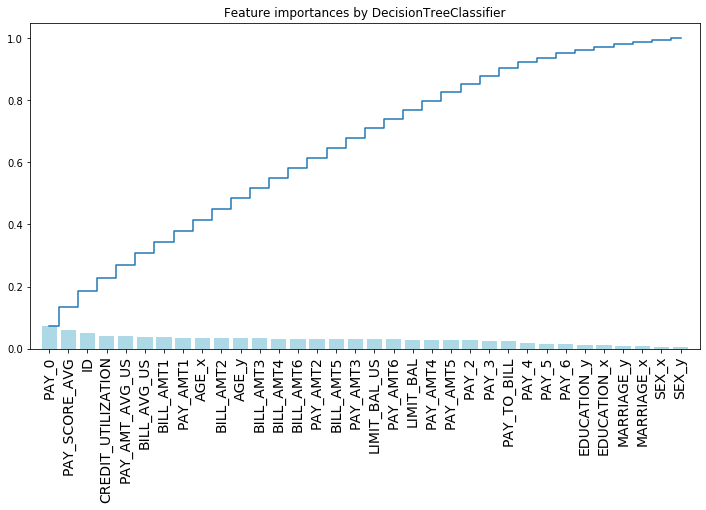

In [9]:
## plot the importances ##
import matplotlib.pyplot as plt
importances = rf.feature_importances_


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), features_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

Making my prediction and seeing how well my model predicted by checking recall, precision, F1 score and making a confusion matrix.
Recall -tells us generally or overall how well our model predicted based on the total of how much it correctly predicted /correctly predicted + how many where actually right but predicted wrong.

                    formula = TP/TP+FN
Precision -tells us or gives us true measure how well our model predicted it shows correctly predicted /correctly predicted + how many the model predicted to be positive but where false.

                   formula = TP/TP+FP
F1 score - gives us a mean of precision and recall, a sumarization of how well it did in respect to recall and precision.

In [10]:
#Make my predictions
rf_y_prediction = rf.predict(X_test)

In [11]:
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))

In [12]:
print(classification_report(y_test, rf_y_prediction,
                            target_names=["non_default", "default"]))

              precision    recall  f1-score   support

 non_default       0.84      0.94      0.89      7040
     default       0.64      0.37      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[6641  399]
 [1241  719]]
Normalized confusion matrix
[[0.94 0.06]
 [0.63 0.37]]


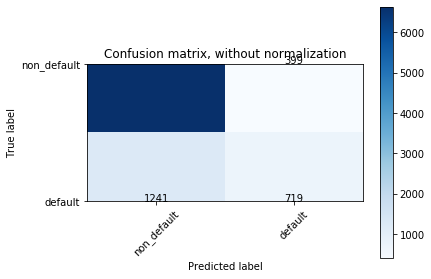

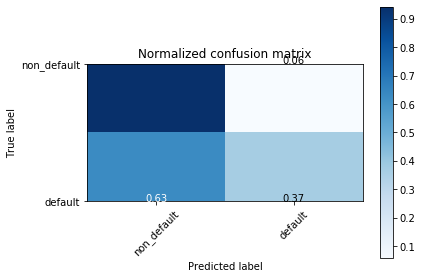

In [14]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf_y_prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['non_default', 'default'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['non_default', 'default'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Explanation of this confusion matrix
In our confusion matrix, the non-default classification has a total of 2,158 points and defualt clssification has a total of 7,742 points.

It correctly identified 7239 points as default and 503 points as non-default.

Non_default classification incorectly predicted 1480 points as default and correctly classified 678 points as Non defualt.

## Launch Neural Network Model

In [15]:
X_scaler = StandardScaler().fit(X_train)

In [16]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [18]:
nn_model = Sequential()

W1214 13:37:31.738304 21476 module_wrapper.py:139] From C:\Users\heine\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [19]:
nn_model.add(Dense(units = 50, activation ='relu', input_dim=34))
nn_model.add(Dense(units = 20, activation ='relu')) #second hidden layer

W1214 13:37:31.762239 21476 module_wrapper.py:139] From C:\Users\heine\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1214 13:37:31.778198 21476 module_wrapper.py:139] From C:\Users\heine\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [20]:

nn_model.add(Dense(units = 2, activation = 'softmax'))

In [21]:
nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                1750      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 42        
Total params: 2,812
Trainable params: 2,812
Non-trainable params: 0
_________________________________________________________________


In [22]:
#compile the model
nn_model.compile(optimizer = 'adam' ,
             loss = 'categorical_crossentropy',
             metrics =['accuracy'])

W1214 13:37:31.855989 21476 module_wrapper.py:139] From C:\Users\heine\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1214 13:37:31.883913 21476 module_wrapper.py:139] From C:\Users\heine\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [23]:
#train the model

nn_model.fit(X_train_scaled, y_train_categorical, epochs=100,shuffle = True,verbose =2)

W1214 13:37:32.033558 21476 deprecation.py:323] From C:\Users\heine\Anaconda3\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1214 13:37:32.098369 21476 module_wrapper.py:139] From C:\Users\heine\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1214 13:37:32.213068 21476 module_wrapper.py:139] From C:\Users\heine\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W1214 13:37:32.290826 21476 module_wrapper.py:139] From C:\Users\heine\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W1214 13

Epoch 1/100


W1214 13:37:32.506295 21476 module_wrapper.py:139] From C:\Users\heine\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



 - 2s - loss: 0.4768 - acc: 0.8012
Epoch 2/100
 - 1s - loss: 0.4455 - acc: 0.8164
Epoch 3/100
 - 1s - loss: 0.4359 - acc: 0.8173
Epoch 4/100
 - 1s - loss: 0.4311 - acc: 0.8199
Epoch 5/100
 - 1s - loss: 0.4274 - acc: 0.8215
Epoch 6/100
 - 1s - loss: 0.4248 - acc: 0.8197
Epoch 7/100
 - 1s - loss: 0.4233 - acc: 0.8217
Epoch 8/100
 - 1s - loss: 0.4207 - acc: 0.8222
Epoch 9/100
 - 1s - loss: 0.4192 - acc: 0.8232
Epoch 10/100
 - 1s - loss: 0.4177 - acc: 0.8247
Epoch 11/100
 - 1s - loss: 0.4157 - acc: 0.8240
Epoch 12/100
 - 1s - loss: 0.4141 - acc: 0.8253
Epoch 13/100
 - 1s - loss: 0.4133 - acc: 0.8244
Epoch 14/100
 - 1s - loss: 0.4118 - acc: 0.8268
Epoch 15/100
 - 1s - loss: 0.4103 - acc: 0.8265
Epoch 16/100
 - 1s - loss: 0.4090 - acc: 0.8264
Epoch 17/100
 - 1s - loss: 0.4077 - acc: 0.8264
Epoch 18/100
 - 1s - loss: 0.4071 - acc: 0.8273
Epoch 19/100
 - 1s - loss: 0.4065 - acc: 0.8273
Epoch 20/100
 - 1s - loss: 0.4046 - acc: 0.8287
Epoch 21/100
 - 1s - loss: 0.4033 - acc: 0.8292
Epoch 22/100


In [24]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test_categorical,verbose =2)
print( model_loss )
print (model_accuracy)

0.5140102035204569
0.7903333333333333


In [25]:
nn_y_prediction = nn_model.predict_classes(X_test)

In [26]:
nn_roc_auc = roc_auc_score(y_test, nn_model.predict_classes(X_test))

In [27]:
print(classification_report(y_test, nn_y_prediction,
                            target_names=['non_default', 'default']))

              precision    recall  f1-score   support

 non_default       0.80      0.65      0.72      7040
     default       0.25      0.42      0.31      1960

    accuracy                           0.60      9000
   macro avg       0.53      0.54      0.52      9000
weighted avg       0.68      0.60      0.63      9000



Confusion matrix, without normalization
[[4555 2485]
 [1130  830]]
Normalized confusion matrix
[[0.65 0.35]
 [0.58 0.42]]


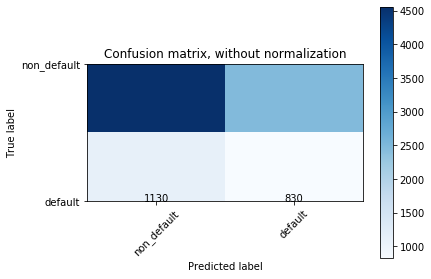

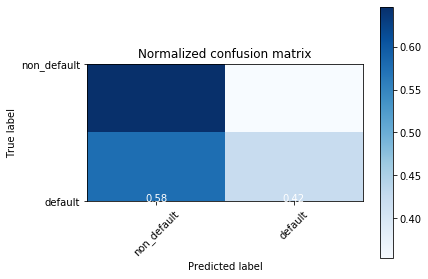

In [28]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, nn_y_prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['non_default', 'default'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['non_default', 'default'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Logistic Regression Model 

In [29]:
#creating logistic regression model
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
#fitting the model
classifier.fit(X_train, y_train) 

C:\Users\heine\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
log_y_prediction = classifier.predict(X_test)

In [32]:
log_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))

In [33]:
print(classification_report(y_test, log_y_prediction,
                            target_names=['non_default', 'default' ]))

              precision    recall  f1-score   support

 non_default       0.78      1.00      0.88      7040
     default       0.00      0.00      0.00      1960

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



C:\Users\heine\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[7040    0]
 [1960    0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


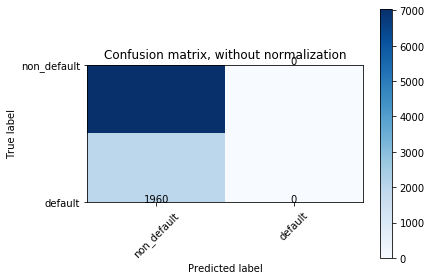

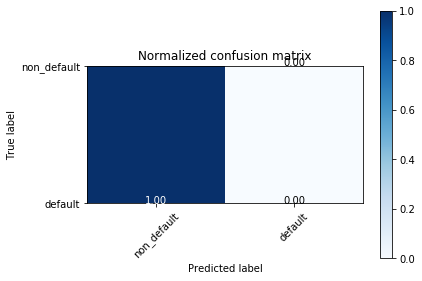

In [34]:
cnf_matrix = confusion_matrix(y_test, log_y_prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['non_default', 'default'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['non_default', 'default'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

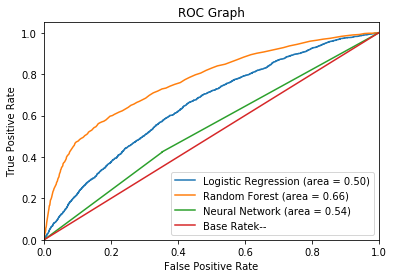

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
nn_fpr, nn_tpr, nn_thresholds = roc_curve(y_test, nn_model.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(nn_fpr, nn_tpr, label='Neural Network (area = %0.2f)' % nn_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.savefig('.\\ROC.png')
plt.show()